In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Choropleth
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim
import os
from pathlib import Path

In [2]:
# Guardar todos os outputs numa única pasta
output_folder = Path.cwd() / "output"
output_folder.mkdir(parents=True, exist_ok=True)

# Exemplo: mapa.save(output_folder / 'mapa_de_calor_portugal_Danielle.html')

In [4]:
p = Path.cwd()
data_folder = p.parent.parent / "data"
shape_folder = p.parent.parent / "shape"
file_path = data_folder / "3-consumos-faturados-por-municipio-ultimos-10-anos.csv"

x = pd.read_csv(file_path, sep = ";")

In [5]:
x["Distrito"] = x["Distrito"].str.title()
x["Freguesia"] = x["Freguesia"].str.title()

In [6]:
x.dtypes

Ano                               int64
Mês                               int64
Data                             object
Distrito                         object
Concelho                         object
Freguesia                        object
Nível de Tensão                  object
Energia Ativa (kWh)             float64
CodDistrito                       int64
CodDistritoConcelho               int64
CodDistritoConcelhoFreguesia     object
dtype: object

In [7]:
x.columns

Index(['Ano', 'Mês', 'Data', 'Distrito', 'Concelho', 'Freguesia',
       'Nível de Tensão', 'Energia Ativa (kWh)', 'CodDistrito',
       'CodDistritoConcelho', 'CodDistritoConcelhoFreguesia'],
      dtype='object')

In [8]:
x

,Ano,Mês,Data,Distrito,Concelho,Freguesia,Nível de Tensão,Energia Ativa (kWh),CodDistrito,CodDistritoConcelho,CodDistritoConcelhoFreguesia
0,2023,4,2023-04,Coimbra,Montemor-o-Velho,Carapinheira,Baixa Tensão,371285.378,6,610,061003
1,2023,10,2023-10,Faro,Olhão,Uf Moncarapacho E Fuseta,"Muito Alta, Alta e Média Tensões",300216.272,8,810,081006
2,2023,10,2023-10,Guarda,Sabugal,Uf Seixo Do Coa E Vale Longo,Baixa Tensão,32071.531,9,911,091147
3,2023,10,2023-10,Porto,Felgueiras,Aiao,Baixa Tensão,109921.638,13,1303,130301
4,2023,10,2023-10,Viana Do Castelo,Ponte de Lima,Vitorino Das Donas,Baixa Tensão,126753.245,16,1607,160750
...,...,...,...,...,...,...,...,...,...,...,...
165019,2022,7,2022-07,Braga,Amares,Rendufe,Baixa Tensão,185958.894,3,301,030118
165020,2022,7,2022-07,Braga,Barcelos,Airo,Baixa Tensão,118017.423,3,302,030205
165021,2022,7,2022-07,Guarda,Figueira de Castelo Rodrigo,Castelo Rodrigo,"Muito Alta, Alta e Média Tensões",81598.969,9,904,090403
165022,2022,7,2022-07,Lisboa,Lisboa,Sao Domingos De Benfica,Baixa Tensão,7611465.658,11,1106,110639


In [9]:
x['Ano'].unique()

array([2023, 2021, 2022, 2020], dtype=int64)

### Distritos

In [10]:
tabela = x.groupby(["Distrito", "Ano"])['Energia Ativa (kWh)'].sum().reset_index()
tabela

,Distrito,Ano,Energia Ativa (kWh)
0,Aveiro,2020,7.413583e+08
1,Aveiro,2021,4.381048e+09
2,Aveiro,2022,4.352445e+09
3,Aveiro,2023,3.660740e+09
4,Beja,2020,1.623842e+08
...,...,...,...
67,Vila Real,2023,4.850928e+08
68,Viseu,2020,2.419444e+08
69,Viseu,2021,1.381127e+09
70,Viseu,2022,1.386047e+09


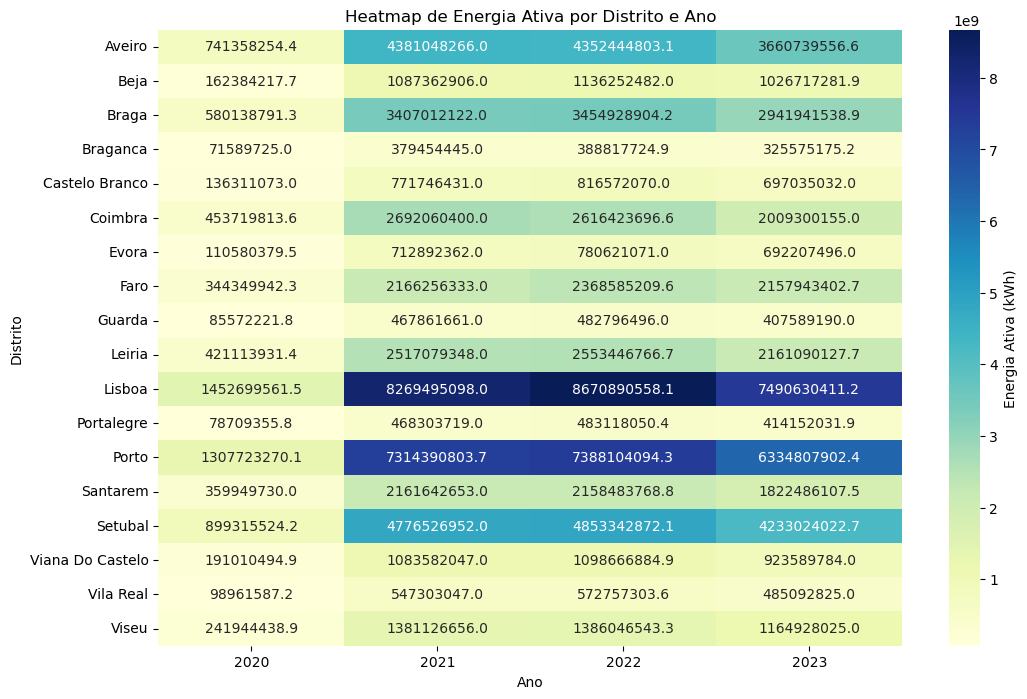

In [11]:
heatmap_data = tabela.pivot(index='Distrito', columns='Ano', values='Energia Ativa (kWh)')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Energia Ativa (kWh)'})
plt.title('Heatmap de Energia Ativa por Distrito e Ano')
plt.show()

In [12]:
tabela = tabela[tabela["Ano"]==2023]
tabela

,Distrito,Ano,Energia Ativa (kWh)
3,Aveiro,2023,3.660740e+09
7,Beja,2023,1.026717e+09
11,Braga,2023,2.941942e+09
15,Braganca,2023,3.255752e+08
19,Castelo Branco,2023,6.970350e+08
23,Coimbra,2023,2.009300e+09
27,Evora,2023,6.922075e+08
31,Faro,2023,2.157943e+09
35,Guarda,2023,4.075892e+08
39,Leiria,2023,2.161090e+09


In [13]:
# Função para obter as coordenadas (latitude e longitude) de um distrito usando Nominatim
def obter_coordenadas(distrito):
    geolocator = Nominatim(user_agent="my_geocoder")
    location = geolocator.geocode(f"{distrito}, Portugal")
    return (location.latitude, location.longitude)

# Aplica a função para obter as coordenadas para cada distrito no DataFrame
tabela['latitude'], tabela['longitude'] = zip(*tabela['Distrito'].apply(obter_coordenadas))

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o heatmap usando as coordenadas dos distritos e os valores de Energia Ativa
heat_data = [[row['latitude'], row['longitude'], row['Energia Ativa (kWh)']] for index, row in tabela.iterrows()]
HeatMap(heat_data).add_to(mapa)

mapa.save(output_folder / 'heatmap_portugal.html')

C:\Users\diogo\AppData\Local\Temp\ipykernel_28400\3889884694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['latitude'], tabela['longitude'] = zip(*tabela['Distrito'].apply(obter_coordenadas))
C:\Users\diogo\AppData\Local\Temp\ipykernel_28400\3889884694.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tabela['latitude'], tabela['longitude'] = zip(*tabela['Distrito'].apply(obter_coordenadas))


In [16]:
file_path = shape_folder / "distritos.shp"
distritos = gpd.read_file(file_path)

# Renomeie a coluna 'NAME_1' para 'Distrito' para correspondência
distritos.rename(columns={'NAME_1': 'Distrito'}, inplace=True)

# Mescla os dados do seu_dataframe com as geometrias dos distritos
mapa_data = distritos.merge(tabela, how='left', left_on='Distrito', right_on='Distrito')
print(mapa_data)

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Distrito', 'Energia Ativa (kWh)'],
    key_on='feature.properties.Distrito',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Energia Ativa (kWh)'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder /'mapa_de_calor_portugal.html')  # Salve o mapa como um arquivo HTML


    ID_0  ISO    NAME_0  ID_1          Distrito HASC_1  CCN_1 CCA_1  \
0    182  PRT  Portugal     1             Évora  PT.EV      0    07   
1    182  PRT  Portugal     2            Aveiro  PT.AV      0    01   
2    182  PRT  Portugal     3            Açores  PT.AZ      0    40   
3    182  PRT  Portugal     4              Beja  PT.BE      0    02   
4    182  PRT  Portugal     5             Braga  PT.BR      0    03   
5    182  PRT  Portugal     6          Bragança  PT.BA      0    04   
6    182  PRT  Portugal     7    Castelo Branco  PT.CB      0    05   
7    182  PRT  Portugal     8           Coimbra  PT.CO      0    06   
8    182  PRT  Portugal     9              Faro  PT.FA      0    08   
9    182  PRT  Portugal    10            Guarda  PT.GU      0    09   
10   182  PRT  Portugal    11            Leiria  PT.LE      0    10   
11   182  PRT  Portugal    12            Lisboa  PT.LI      0    11   
12   182  PRT  Portugal    13           Madeira  PT.MA      0    30   
13   1

### Concelhos

In [14]:
tabela2 = x.groupby(["Concelho", "Ano"])['Energia Ativa (kWh)'].sum().reset_index()
tabela2

,Concelho,Ano,Energia Ativa (kWh)
0,Abrantes,2020,3.141263e+07
1,Abrantes,2021,1.762904e+08
2,Abrantes,2022,1.474796e+08
3,Abrantes,2023,1.220096e+08
4,Aguiar da Beira,2020,2.762636e+06
...,...,...,...
1107,Ílhavo,2023,1.748502e+08
1108,Óbidos,2020,1.090837e+07
1109,Óbidos,2021,6.577191e+07
1110,Óbidos,2022,6.835300e+07


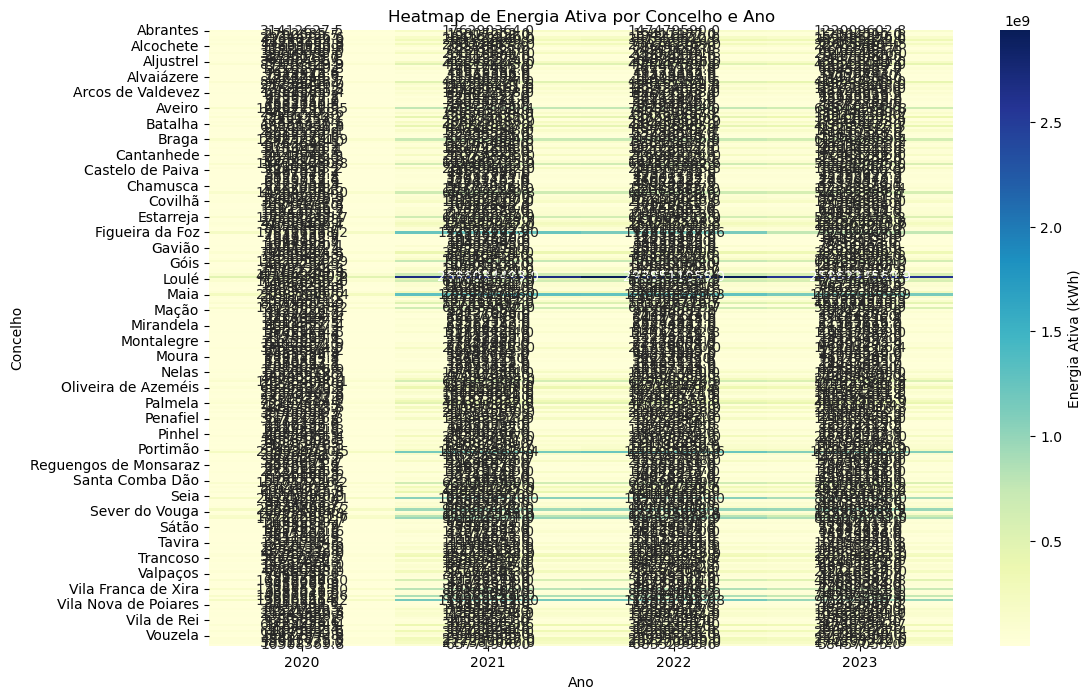

In [15]:
heatmap_data = tabela2.pivot(index='Concelho', columns='Ano', values='Energia Ativa (kWh)')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Energia Ativa (kWh)'})
plt.title('Heatmap de Energia Ativa por Concelho e Ano')
plt.show()

In [16]:
tabela2 = tabela2[tabela2["Ano"]==2022]
tabela2

,Concelho,Ano,Energia Ativa (kWh)
2,Abrantes,2022,1.474796e+08
6,Aguiar da Beira,2022,1.581719e+07
10,Alandroal,2022,1.942188e+07
14,Albergaria-a-Velha,2022,1.978193e+08
18,Albufeira,2022,3.515565e+08
...,...,...,...
1094,Vouzela,2022,2.601122e+07
1098,Águeda,2022,2.899952e+08
1102,Évora,2022,2.872706e+08
1106,Ílhavo,2022,2.047008e+08


In [17]:
file_path = shape_folder / "concelhos.shp"
Concelho = gpd.read_file(file_path)
Concelho

,ID_0,ISO,NAME_0,ID_1,NAME_1,ID_2,NAME_2,HASC_2,CCN_2,CCA_2,TYPE_2,ENGTYPE_2,NL_NAME_2,VARNAME_2,geometry
0,182,PRT,Portugal,1,Évora,1,Évora,PT.EV.EV,0,0705,Concelho,Municipality,None,None,"POLYGON ((-7.79291 38.76507, -7.79287 38.76506..."
1,182,PRT,Portugal,1,Évora,2,Alandroal,PT.EV.AL,0,0701,Concelho,Municipality,None,None,"POLYGON ((-7.25937 38.77351, -7.25921 38.77343..."
2,182,PRT,Portugal,1,Évora,3,Arraiolos,PT.EV.AR,0,0702,Concelho,Municipality,None,None,"POLYGON ((-7.88611 38.92495, -7.88580 38.92472..."
3,182,PRT,Portugal,1,Évora,4,Borba,PT.EV.BO,0,0703,Concelho,Municipality,None,None,"POLYGON ((-7.46362 38.92344, -7.46344 38.92329..."
4,182,PRT,Portugal,1,Évora,5,Estremoz,PT.EV.ES,0,0704,Concelho,Municipality,None,None,"POLYGON ((-7.52770 39.00080, -7.52765 39.00066..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303,182,PRT,Portugal,20,Viseu,302,Tarouca,PT.VI.TR,0,1820,Concelho,Municipality,None,None,"POLYGON ((-7.72591 41.08079, -7.72442 41.08028..."
304,182,PRT,Portugal,20,Viseu,303,Tondela,PT.VI.TO,0,1821,Concelho,Municipality,None,None,"POLYGON ((-8.12772 40.64028, -8.12751 40.64027..."
305,182,PRT,Portugal,20,Viseu,304,Vila Nova de Paiva,PT.VI.VP,0,1822,Concelho,Municipality,None,None,"POLYGON ((-7.77933 40.93439, -7.77835 40.93436..."
306,182,PRT,Portugal,20,Viseu,305,Viseu,PT.VI.VS,0,1823,Concelho,Municipality,None,None,"POLYGON ((-7.80686 40.83789, -7.80653 40.83787..."


In [18]:
# Renomeie a coluna 'NAME_1' para 'Distrito' para correspondência
Concelho.rename(columns={'NAME_1': 'Concelho'}, inplace=True)

# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Concelho.merge(tabela2, how='left', left_on='Concelho', right_on='Concelho')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Concelho', 'Energia Ativa (kWh)'],
    key_on='feature.properties.Concelho',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Energia Ativa (kWh)'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'mapa_de_calor_portugal_Concelho.html')  # Salve o mapa como um arquivo HTML

### Freguesias (Não é boa ideia)

In [19]:
tabela3 = x.groupby(["Freguesia", "Ano"])['Energia Ativa (kWh)'].sum().reset_index()
tabela3

,Freguesia,Ano,Energia Ativa (kWh)
0,A Dos Francos,2020,7.526270e+05
1,A Dos Francos,2021,4.604378e+06
2,A Dos Francos,2022,4.430113e+06
3,A Dos Francos,2023,4.007729e+06
4,A Dos Negros,2020,5.534461e+05
...,...,...,...
10867,Zibreira,2023,1.105320e+08
10868,Zoio,2020,4.729785e+04
10869,Zoio,2021,2.560230e+05
10870,Zoio,2022,2.728580e+05


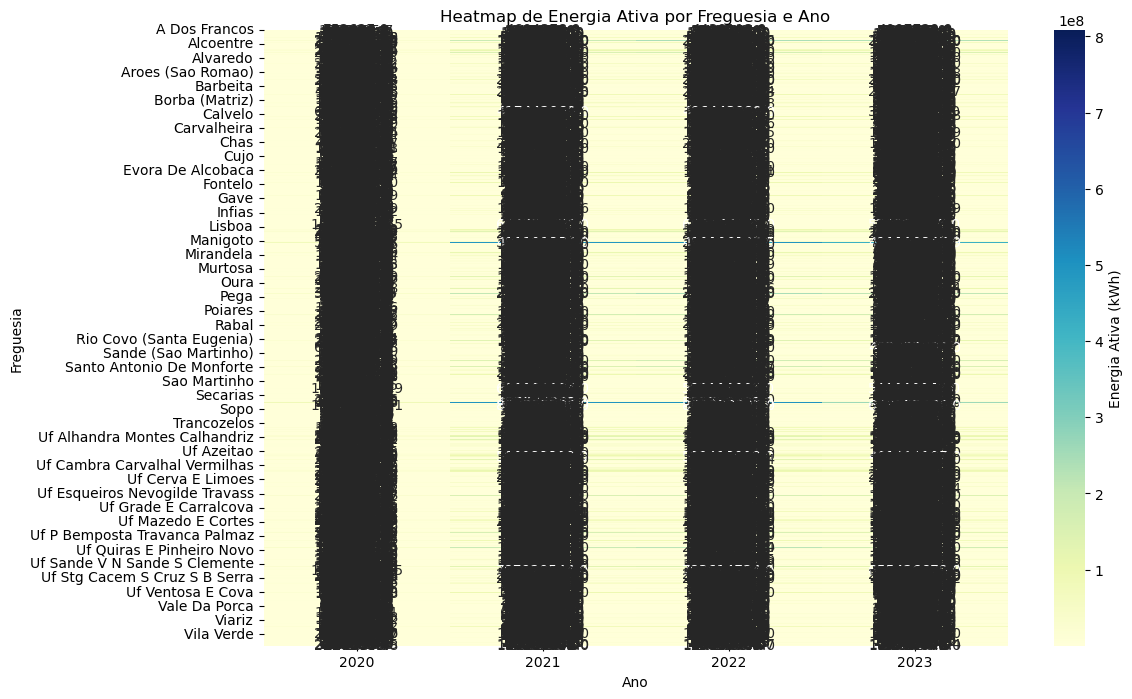

In [20]:
heatmap_data = tabela3.pivot(index='Freguesia', columns='Ano', values='Energia Ativa (kWh)')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Energia Ativa (kWh)'})
plt.title('Heatmap de Energia Ativa por Freguesia e Ano')
plt.show()

In [21]:
tabela3 = tabela3[tabela3["Ano"]==2022]
tabela3

,Freguesia,Ano,Energia Ativa (kWh)
2,A Dos Francos,2022,4430113.0
6,A Dos Negros,2022,3088204.0
10,Abacas,2022,1544706.0
14,Abade De Neiva,2022,9098657.0
18,Abadim,2022,916816.0
...,...,...,...
10854,Vreia De Bornes,2022,799365.0
10858,Vreia De Jales,2022,1661330.0
10862,Zambujal,2022,569483.0
10866,Zibreira,2022,129959769.0


In [22]:
file_path = shape_folder / "Cont_AAD_CAOP2017.shp"
Freguesia = gpd.read_file(file_path)
Freguesia

,Dicofre,Freguesia,Concelho,Distrito,TAA,AREA_EA_Ha,AREA_T_Ha,Des_Simpli,geometry
0,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.09,4117.69,Albufeira e Olhos de Água,"POLYGON ((-13243.458 -288011.973, -13244.464 -..."
1,081504,Sagres,VILA DO BISPO,FARO,ÁREA PRINCIPAL,3431.83,3436.91,Sagres,"POLYGON ((-67806.358 -291271.354, -67809.689 -..."
2,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15487.120 -287903.523, -15487.725 -..."
3,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15520.560 -287893.679, -15521.650 -..."
4,080106,Albufeira e Olhos de Água,ALBUFEIRA,FARO,ÁREA SECUNDÁRIA,0.01,4117.69,Albufeira e Olhos de Água,"POLYGON ((-15531.602 -287884.483, -15532.205 -..."
...,...,...,...,...,...,...,...,...,...
3218,160307,Fiães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1121.27,1121.27,Fiães,"POLYGON ((-6958.588 271490.176, -6819.697 2714..."
3219,160323,União das freguesias de Vila e Roussas,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,1150.87,1150.87,Vila e Roussas,"POLYGON ((-7410.359 271732.200, -7426.438 2717..."
3220,160322,União das freguesias de Prado e Remoães,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,366.75,366.75,Prado e Remoães,"POLYGON ((-10963.311 272457.595, -10986.160 27..."
3221,160320,União das freguesias de Chaviães e Paços,MELGAÇO,VIANA DO CASTELO,ÁREA PRINCIPAL,847.90,847.90,Chaviães e Paços,"POLYGON ((-6958.588 271490.176, -7410.359 2717..."


In [23]:
# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Freguesia.merge(tabela3, how='left', left_on='Freguesia', right_on='Freguesia')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Freguesia', 'Energia Ativa (kWh)'],
    key_on='feature.properties.Freguesia',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Energia Ativa (kWh)'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'mapa_de_calor_portugal_Freguesia.html')

## Danielle: 31 agosto a 15 setembro 2022

- Velocidade do vento: max. 139 km/
- Sobre a terra : max. 46 km
- Diâmetro: max. 69- 6 km
- Pressão e ar: abaixo 972 mbar
- Escala Saffir- impson: categoria 1
- Regiões Afetadas: Norteas
Norte

![](https://bordalo.observador.pt/v2/q:84/rs:fill:1667:935/c:1667:935:nowe:68:130/plain/https://s3.observador.pt/wp-content/uploads/2022/09/08114847/captura-de-ecra-2022-09-08-as-114742.jpg)

In [24]:
Danielle = x[(x["Ano"] == 2022) & (x["Mês"] == 9)]
Danielle

,Ano,Mês,Data,Distrito,Concelho,Freguesia,Nível de Tensão,Energia Ativa (kWh),CodDistrito,CodDistritoConcelho,CodDistritoConcelhoFreguesia
74,2022,9,2022-09,Aveiro,Santa Maria da Feira,Santa Maria De Lamas,"Muito Alta, Alta e Média Tensões",3678075.715,1,109,010925
75,2022,9,2022-09,Faro,Portimão,Alvor,Baixa Tensão,2666067.567,8,811,081101
76,2022,9,2022-09,Guarda,Guarda,Fernao Joanes,Baixa Tensão,29813.829,9,907,090718
77,2022,9,2022-09,Portalegre,Avis,Ervedal,Baixa Tensão,87329.699,12,1203,120305
78,2022,9,2022-09,Porto,Marco de Canaveses,Varzea Aliviada E Folhada,Baixa Tensão,285850.429,13,1307,130740
...,...,...,...,...,...,...,...,...,...,...,...
164780,2022,9,2022-09,Porto,Santo Tirso,Reguenga,Baixa Tensão,189461.824,13,1314,131418
164781,2022,9,2022-09,Vila Real,Montalegre,Tourem,Baixa Tensão,14245.040,17,1706,170632
164782,2022,9,2022-09,Viseu,Castro daire,Cabril,Baixa Tensão,45974.560,18,1803,180303
164783,2022,9,2022-09,Viseu,Penedono,Uf Penedono E Granja,"Muito Alta, Alta e Média Tensões",15195.972,18,1812,181211


In [25]:
tabelaDanielle = Danielle.groupby(["Concelho", "Ano"])['Energia Ativa (kWh)'].sum().reset_index()
tabelaDanielle

,Concelho,Ano,Energia Ativa (kWh)
0,Abrantes,2022,1.147628e+07
1,Aguiar da Beira,2022,1.232630e+06
2,Alandroal,2022,1.542649e+06
3,Albergaria-a-Velha,2022,1.693008e+07
4,Albufeira,2022,3.333244e+07
...,...,...,...
273,Vouzela,2022,2.088380e+06
274,Águeda,2022,2.278248e+07
275,Évora,2022,2.275866e+07
276,Ílhavo,2022,1.702825e+07


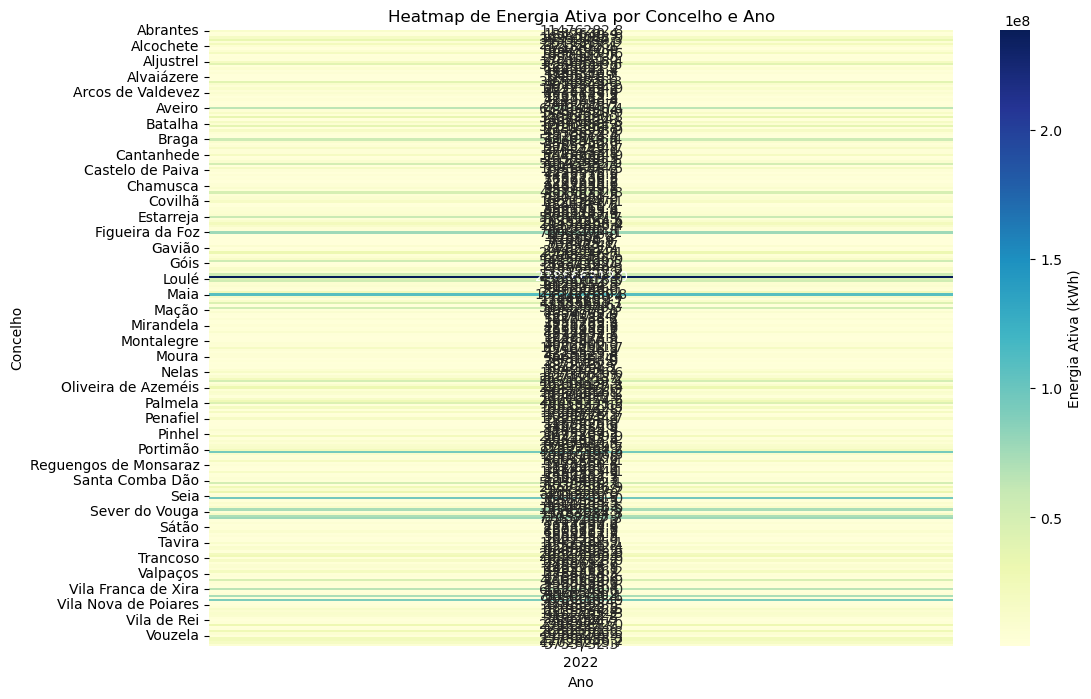

In [26]:
heatmap_data = tabelaDanielle.pivot(index='Concelho', columns='Ano', values='Energia Ativa (kWh)')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt='.1f', cmap='YlGnBu', cbar_kws={'label': 'Energia Ativa (kWh)'})
plt.title('Heatmap de Energia Ativa por Concelho e Ano')
plt.show()

In [27]:
# Renomeie a coluna 'NAME_1' para 'Distrito' para correspondência
Concelho.rename(columns={'NAME_1': 'Concelho'}, inplace=True)

# Mescla os dados do seu_dataframe com as geometrias dos concelhos
mapa_data = Concelho.merge(tabelaDanielle, how='left', left_on='Concelho', right_on='Concelho')

# Crie um mapa folium centrado em Portugal
mapa = folium.Map(location=[39.5, -8.0], zoom_start=6)

# Adicione o mapa de calor com cores diferentes para cada distrito
Choropleth(
    geo_data=mapa_data,
    name='choropleth',
    data=mapa_data,
    columns=['Concelho', 'Energia Ativa (kWh)'],
    key_on='feature.properties.Concelho',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Energia Ativa (kWh)'
).add_to(mapa)

# Exiba o mapa
mapa.save(output_folder / 'mapa_de_calor_portugal_Danielle.html')  # Salve o mapa como um arquivo HTML